# Part I - Loan Data from Prosper
## by Jasmine W.

## Introduction

The dataset holds data about 113,937 loans from a company called _Prosper_. This includes the following loan information: **"Listing Key"**, **"Listing Number"**, **"Listing Creation Date"**, **"Credit Grade"**, **"Term"**, **"Loan Status"**, **"Closed Date"**, **"Borrower APR"**, **"Borrower Rate"**, **"Lender Yield"**, **"Estimated Effective Yield"**, **"Estimated Loss"**, **"Estimated Return"**, **"Prosper Rating (numeric)"**, **"Prosper Rating (Alpha)"**, **"Prosper Score"**, **"Listing Category (numeric)"**, **"Borrower State"**, **"Occupation"**, **"Employment Status"**, **"Employment Status Duration"**, **"Is Borrower Homeowner"**, **"Currently In Group"**, **"Group Key"**, **"Date Credit Pulled"**, **"Credit Score Range Lower"**, **"Credit Score Range Upper"**, **"First Recorded Credit Line"**, **"Current Credit Lines"**, **"Open Credit Lines"**, **"Total Credit Lines past 7 years"**, **"Open Revolving Accounts"**, **"Open Revolving Monthly Payment"**, **"Inquiries Last 6 Months"**, **"Total Inquiries"**, **"Current Delinquencies"**, **"Amount Delinquent"**, **"Delinquencies Last 7 Years"**, **"Public Records Last 10 Years"**, **"Public Records Last 12 Months"**, **"Revolving Credit Balance"**, **"Bankcard Utilization"**, **"Available Bankcard Credit"**, **"Total Trades"**, **"Trades Never Delinquent (percentage)"**, **"Trades Opened Last 6 Months"**, **"Debt To Income Ratio"**, **"Income Range"**, **"Income Verifiable"**, **"Stated Monthly Income"**, **"Loan Key"**, **"Total Prosper Loans"**, **"Total Prosper Payments Billed"**, **"On Time Prosper Payments"**, **"Prosper Payments Less Than One Month Late"**, **"Prosper Payments One Month Plus Late"**, **"Prosper Principal Borrowed"**, **"Prosper Principal Outstanding"**, **"Score x Change At Time Of Listing"**, **"Loan Current Days Delinquent"**, **"Loan First Defaulted Cycle Number"**, **"Loan Months Since Origination"**, **"Loan Number"**, **"Loan Original Amount"**, **"Loan Origination Date"**, **"Loan Origination Quarter"**, **"Member Key"**, **"Monthly Loan Payment"**, **"LP_Customer Payments"**, **"LP_Customer Principal Payments"**, **"LP_Interest and Fees"**, **"LP_Service Fees"**, **"LP_Collection Fees"**, **"LP_Gross Principal Loss"**, **"LP_Net Principal Loss"**, **"LP_NonPrincipal Recovery Payments"**, **"Percent Funded"**, **"Recommendations"**, **"Investment From Friends Count"**, **"Investment From Friends Amount"**, and **"Investors"**.

## Preliminary Wrangling

In [857]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [858]:
import zipfile

# opens zip file in read-mode
with zipfile.ZipFile("prosperLoanData.zip", "r") as zip_ref:
    
    # extracts all data in zip file
    zip_ref.extractall("prosperLoanData/")

# loads CSV file of dataset
df_prosper_loan_data = pd.read_csv("prosperLoanData/prosperLoanData.csv")

### What is the structure of your dataset?

The dataset was loaded into a dataframe called **df_prosper_loan_data**. The original dataset is held in a CSV file. The CSV file was compressed and held in a zip file because the CSV file itself could not be uploaded into the GitHub repository because it was too large.

### What is/are the main feature(s) of interest in your dataset?

The main features of interest in the dataset are the following columns: **"LoanStatus"**, **"StatedMonthlyIncome"**, **"CreditScoreRangeLower"**, **"CreditScoreRangeUpper"**, and **"AmountDelinquent"**.

The **"LoanStatus"** column will be used to answer the questions associated with the loan status. 

The **"StatedMonthlyIncome"** column will be used to find yearly incomes and create a new column to hold those incomes because the dataset only holds the debt to income ratio, income range, income verifiable, and stated monthly income. The yearly income will be used to answer the questions that involve the person's income. 

The **"CreditScoreRangeLower"**, and **"CreditScoreRangeUpper"** columns will be used to estimate the real _credit score_, which will be used to answer the questions that involve a person's credit score. Since the dataset does not have a column that holds a person's specific credit score, the **"CreditScoreRangeLower"** and **"CreditScoreRangeUpper"** columns have to be used to estimate the credit score to answer the questions that involve the _credit scores_.

The **"AmountDelinquent"** column will be used to answer the questions that involve delinquent amounts.

The **"Term"** column will be used to answer the question that involves loan terms.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main features of interest in the dataset are the following columns: **"ClosedDate"** and **"IncomeVerifiable"**. 

The **"ClosedDate"** column will confirm if the values in the **"LoanStatus"** column are correct. If a value in the **"LoanStatus"** column is **Completed**, then there should be a date in the corresponding row under the **"ClosedDate"** column. If the value in the **"LoanStatus"** column is **Current**, **Past Due**, **Chargedoff**, or any value other than _Completed_, then there should not be a null value in the corresponding row under the **"ClosedDate"** column to show that there is no date when the loan was closed. 

The **"IncomeVerifiable"** column will confirm if the values in the **"StatedMonthlyIncome"** column are true or false. If the values in the **"StatedMonthlyIncome"** column is not a null value, the value in the corresponding row under the **"IncomeVerifiable"** column would confirm that the income range is _true_ by holding the value, **True**. If the value in the **"IncomeVerifiable"** column is **False**, then this confirms that the value in the **"StatedMonthlyIncome"** column is _false_.

## Univariate Exploration

Text(0.5, 1.0, 'Amount of Completed Loans among Yearly Incomes')

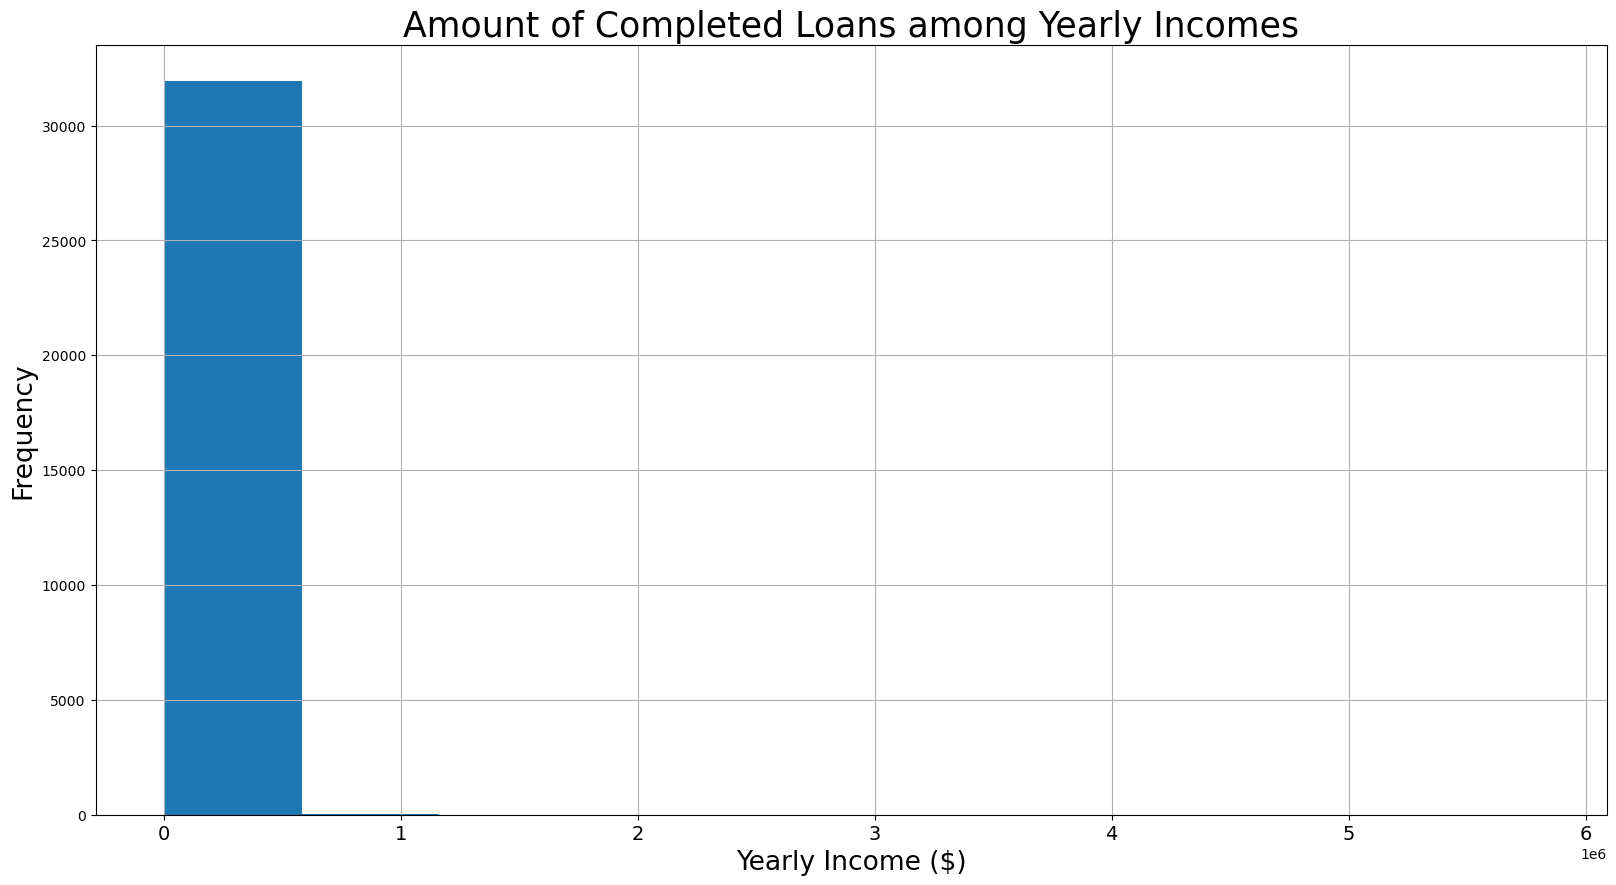

In [859]:
# Code for cleaning data

# drops "CreditGrade" column
df_prosper_loan_data.drop(columns=["CreditGrade"], inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# drops all rows with at least 1 null value in "LoanStatus", "StatedMonthlyIncome", "CreditScoreRangeLower", "CreditScoreRangeUpper", "AmountDelinquent", "IncomeVerifiable" columns
df_prosper_loan_data.dropna(subset=["LoanStatus", "StatedMonthlyIncome", "CreditScoreRangeLower", "CreditScoreRangeUpper", "AmountDelinquent", "IncomeVerifiable"], inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# drops all rows with false values under "IncomeVerifiable" column
df_prosper_loan_data.drop(df_prosper_loan_data[df_prosper_loan_data["IncomeVerifiable"] == 'False'].index, inplace=True) # put condition directly into code for dropping rows with false values because "IncomeVerifiable" column is a BOOLEAN Column (MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED)

# multiples "StatedMonthlyIncome" column by 12 & puts results in new column called "YearlyIncome"
df_prosper_loan_data["YearlyIncome"] = df_prosper_loan_data["StatedMonthlyIncome"].mul(12)

# condition that checks if only Completed loans have Closed Dates
incomplete_loan_with_close_date_condition = df_prosper_loan_data[(df_prosper_loan_data["ClosedDate"].notna()) & (df_prosper_loan_data["LoanStatus"] != 'Completed')].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Closed Dates when they are NOT Completed loans
df_prosper_loan_data.drop(incomplete_loan_with_close_date_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# condition that checks if only Completed loans have Closed Dates
complete_loan_without_close_date_condition = df_prosper_loan_data[(df_prosper_loan_data["ClosedDate"].isnull()) & (df_prosper_loan_data["LoanStatus"] == 'Completed')].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Closed Dates when they are NOT Completed loans
df_prosper_loan_data.drop(complete_loan_without_close_date_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# finds median of "CreditScoreRangeLower" and "CreditScoreRangeUpper" columns & puts results in new column called "CreditScore"
df_prosper_loan_data["CreditScore"] = df_prosper_loan_data[["CreditScoreRangeLower", "CreditScoreRangeUpper"]].median(axis=1)

# condition that checks if credit scores are within 300-850
credit_score_range_condition = df_prosper_loan_data[(df_prosper_loan_data["CreditScore"] <= 300) | (df_prosper_loan_data["CreditScore"] >= 850)].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Credit Scores that are NOT within 300-850
df_prosper_loan_data.drop(credit_score_range_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED

# condition that checks if Loan Terms are either 24, 36, 48, 60, 72 or 84
loan_term_range_condition = df_prosper_loan_data[(df_prosper_loan_data["Term"] != 24) & (df_prosper_loan_data["Term"] != 36) & (df_prosper_loan_data["Term"] != 48) & (df_prosper_loan_data["Term"] != 60) & (df_prosper_loan_data["Term"] != 72) & (df_prosper_loan_data["Term"] != 84)].index # used ".index" because condition will be used under "index" section in ".drop"

# drops rows that have Loan Terms that are NOT either 24, 36, 48, 60, 72 or 84
df_prosper_loan_data.drop(loan_term_range_condition, inplace=True) # MUST USE "inplace=True" TO ENSURE DATA FRAME IS MODIFIED


# Code for creating Histogram with amount of Completed Loans among Yearly Incomes

# creates dataframe with Completed loans ONLY
df_prosper_complete_loans_data = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'Completed']

# creates dataframe with "LoanStatus" & "YearlyIncome" columns of Completed loans ONLY
df_prosper_complete_loans_and_yearly_incomes_data = df_prosper_complete_loans_data[["LoanStatus", "YearlyIncome"]]

# creates & displays Histogram
df_prosper_complete_loans_and_yearly_incomes_data.hist(xlabelsize=14, figsize=(19.5,10))

# adds x-axis label to Histogram
plt.xlabel('Yearly Income ($)', fontsize=19)

# adds y-axis label to Histogram
plt.ylabel('Frequency', fontsize=19)

# adds title to Histogram
plt.title('Amount of Completed Loans among Yearly Incomes', fontsize=25)

Text(0.5, 1.0, 'Amount of Completed Loans among Lowest Yearly Incomes')

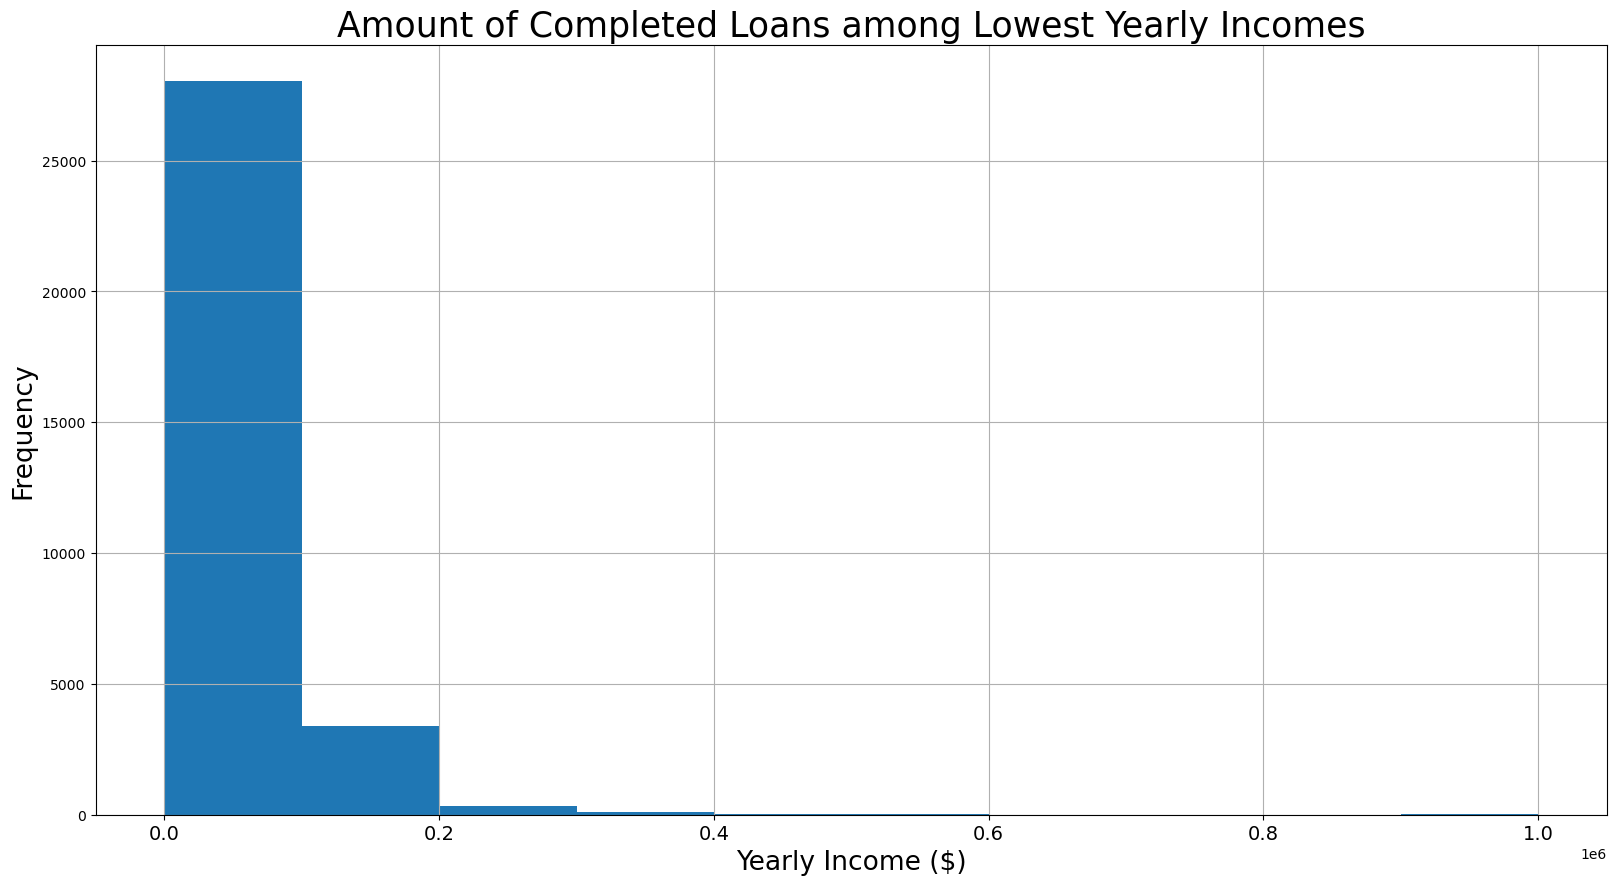

In [860]:
# Code for creating Histogram with amount of Completed Loans among Lowest Yearly Incomes

# filters out Yearly Incomes less than or equal to 1000000
lowest_yearly_incomes_data = df_prosper_complete_loans_data[df_prosper_complete_loans_data["YearlyIncome"] <= 1000000]

# creates dataframe with "LoanStatus" & "YearlyIncome" columns of Completed loans ONLY
df_prosper_complete_loans_and_lowest_yearly_incomes_data = lowest_yearly_incomes_data[["LoanStatus", "YearlyIncome"]]

# creates & displays Histogram
df_prosper_complete_loans_and_lowest_yearly_incomes_data.hist(xlabelsize=14, figsize=(19.5,10))

# adds x-axis label to Histogram
plt.xlabel('Yearly Income ($)', fontsize=19)

# adds y-axis label to Histogram
plt.ylabel('Frequency', fontsize=19)

# adds title to Histogram
plt.title('Amount of Completed Loans among Lowest Yearly Incomes', fontsize=25)

Text(0.5, 1.0, 'Maximum Delinquent Amounts of Loan Status Types')

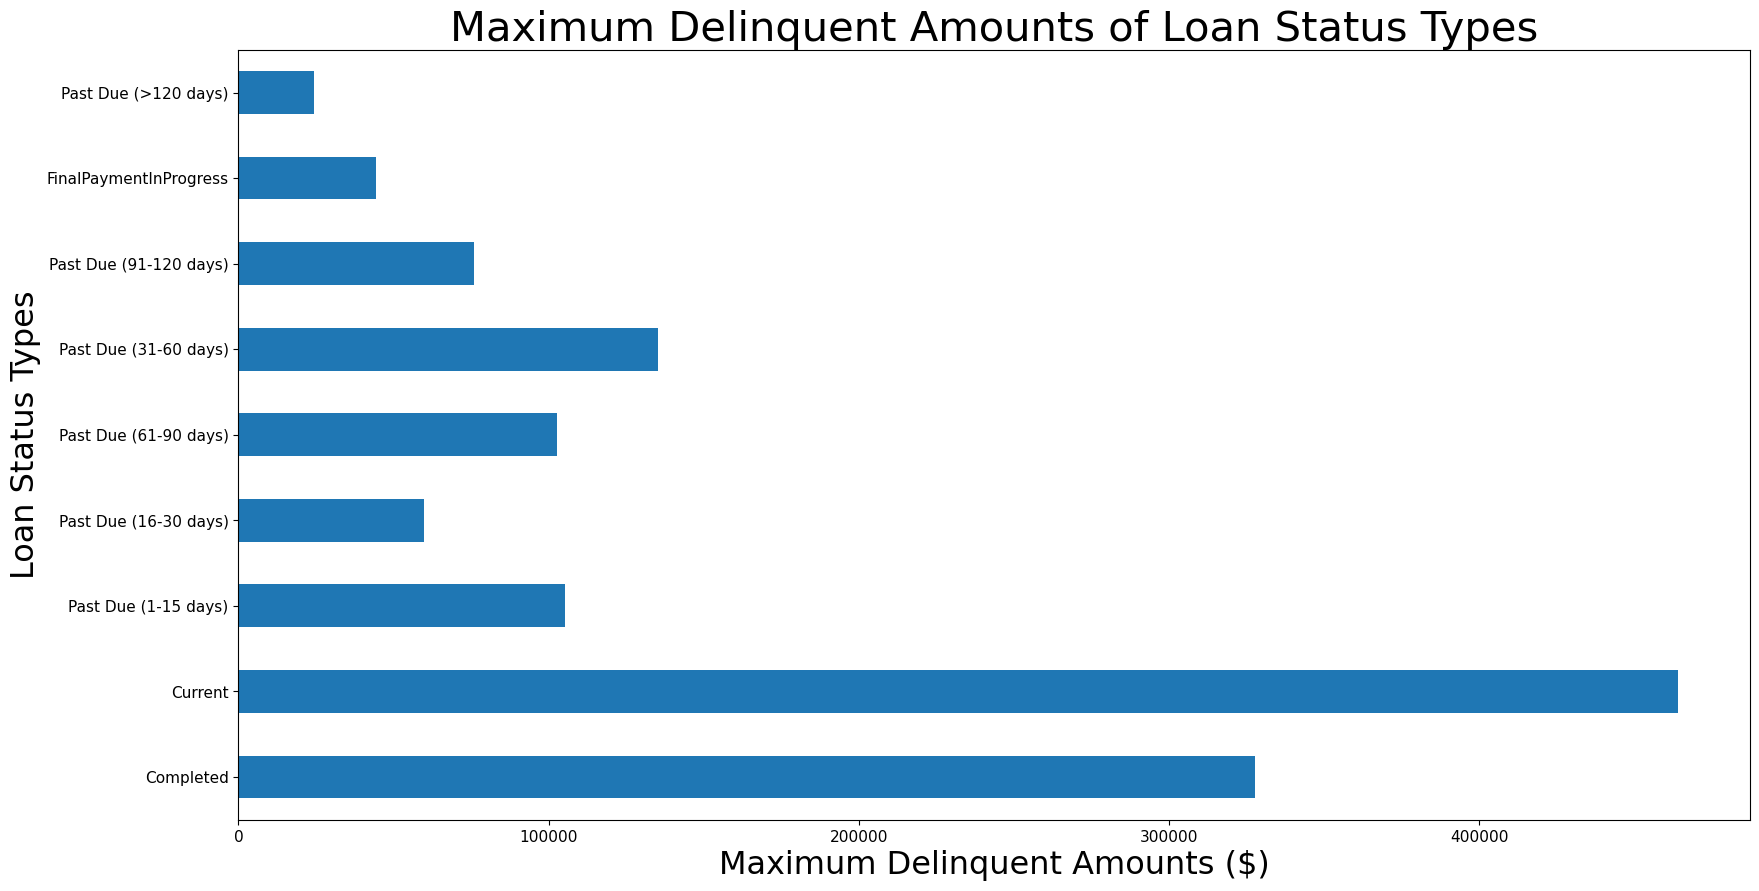

In [861]:
# Code for creating Bar Chart with ALL Loan Status Types & ALL Maximum Delinquent Amounts

# dataframes for Loan Status Types Must Be Created this way because dataframes for all Loan Status Types CANNOT be initialized

# creates dataframe with Current loans
df_current_loans = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'Current']

# creates dataframe of loans with Final Payment In Progress
df_final_payment_in_progress_loans = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'FinalPaymentInProgress']

# creates dataframe with loan Past Due (1-15 days)
df_past_due_1_to_15_days_loans = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'Past Due (1-15 days)']

# creates dataframe with loans Past Due (16-30 days)
df_past_due_16_to_30_days_loans = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'Past Due (16-30 days)']

# creates dataframe with loans Past Due (31-60 days)
df_past_due_31_to_60_days_loans = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'Past Due (31-60 days)']

# creates dataframe with loans Past Due (61-90 days)
df_past_due_61_to_90_days_loans = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'Past Due (61-90 days)']

# creates dataframe with loans Past Due (91-120 days)
df_past_due_91_to_120_days_loans = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'Past Due (91-120 days)']

# creates dataframe with loans Past Due (>120 days)
df_past_due_more_than_120_days_loans = df_prosper_loan_data[df_prosper_loan_data["LoanStatus"] == 'Past Due (>120 days)']

# creates Series to hold names of dataframes for each Loan Status Type
loan_status_dataframe_names = [df_prosper_complete_loans_data, df_current_loans, df_final_payment_in_progress_loans, df_past_due_1_to_15_days_loans, df_past_due_16_to_30_days_loans, df_past_due_31_to_60_days_loans, 
                               df_past_due_61_to_90_days_loans, df_past_due_91_to_120_days_loans, 
                               df_past_due_more_than_120_days_loans] # MUST BE Put AFTER dataframes for each Loan Status Type are Created Because they need to be Declared FIRST

# creates dataframe with Maximum Delinquent Amounts of each Loan Status Type
df_loan_status_and_maximum_delinquent_amounts = pd.DataFrame({
                                                              # creates array with ALL UNIQUE values of Loan Status Types
                                                              'Loan Status Types': df_prosper_loan_data["LoanStatus"].unique(), # holds ALL UNIQUE values of Loan Status
                                                              
                                                              # holds initial values for Maximum Delinquent Amounts of each Loan Status Type
                                                              'Maximum Delinquent Amounts': [0, 0, 0, 0, 0, 0, 0, 0, 0]})

# inputs Maximum Delinquent Amounts of Loan Status into dataframe for Bar Chart
for index, row in df_loan_status_and_maximum_delinquent_amounts.iterrows(): # iterates through Maximum Delinquent Amounts
    # accesses dataframe name from Series of dataframes for each Loan Status Type
    loan_status_type_dataframe = loan_status_dataframe_names[index]
    
    # finds & inputs Maximum Delinquent Amount of each Loan Status into dataframe for Bar Chart
    df_loan_status_and_maximum_delinquent_amounts.loc[index, 'Maximum Delinquent Amounts'] = loan_status_type_dataframe["AmountDelinquent"].max() # dataframe with Completed Loans was ALREADY CREATED in first code cell of "Univariate Exploration" section

# creates & displays Bar Chart
df_loan_status_and_maximum_delinquent_amounts.plot.barh(x='Loan Status Types', y='Maximum Delinquent Amounts', figsize=(19.5,10), legend=False, rot=0, fontsize=11) # Bar Chart is Horizontal, so ALL Labels can be read ("legend=False" REMOVES legend in bar chart)

# adds x-axis label to Bar Chart
plt.xlabel('Maximum Delinquent Amounts ($)', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY X-LABEL SIZE

# adds y-axis label to Bar Chart
plt.ylabel('Loan Status Types', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY Y-LABEL SIZE

# adds title to Bar Chart
plt.title('Maximum Delinquent Amounts of Loan Status Types', fontsize=30) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY TITLE SIZE

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

In **both histograms**, the people with the lowest yearly incomes had the most completed loans while the rest of the yearly incomes do not have a lot.

The **first histogram** showed the amount of completed loans over the whole range of yearly incomes. There was an unusually large amount of completed loans between _0 and 1000000_ dollars while the rest of the yearly incomes do not have a lot of completed loans.

The **bar chart** displayed the maximum delinquent amounts for each loan status. The maximum delinquent amounts of the **Completed** and **Current** loans were _higher than 300000_ while the maximum delinquent amounts of the rest of the loan status types were _less than 200000_.

The **count plots** holds the data of the amount of each **loan term** for each type of **loan status**. 

One **relationship** that was found between the **loan terms** and **loan status** types was that the **loan status** types, **Current** and **Completed**, had the _most amount_ of each **loan term**.

Another **relationship** that was found between the **loan terms** and **loan status** types was that the **loan term**, **36**, had the **most occurrences** for each type of **loan status**.


One **transformation** that was made was that the **"CreditGrade"** column was dropped. If all the null values in the **"CreditGrade"** column were dropped, all the loans left will have closed dates whether the loans are complete or incomplete. If a loan is incomplete, then it should not have a closed date to match the information that the loan is still open. If loans that were _incomplete_ and still have a _closed date_, the information about those loans would be false. Therefore, the rows of those loans would have to be dropped. However, if all those rows with both _incomplete loans_ and _closed dates_ were dropped, the dataset would only have data of _completed loans_. This would prevent questions about loans that are still open from being answered. Therefore, the **"CreditGrade"**, column was dropped.

Another **transformation** that was performed was that rows with null values in the **"LoanStatus"**, **"StatedMonthlyIncome"**,**"CreditScoreRangeLower"**, **"CreditScoreRangeUpper"**, and **"AmountDelinquent"** columns were dropped. The rows with null values in the **"LoanStatus"**, **"StatedMonthlyIncome"**, **"CreditScoreRangeLower"**, **"CreditScoreRangeUpper"**, and **"AmountDelinquent"** columns were dropped because those rows could not be analyzed. This was also done to decrease the amount of data to analyze. If all the rows with at least one null value, except for rows with null values under the **"ClosedDate"** column, were deleted, there would be no data left because all the rows have at least one null value that is not under the **"ClosedDate"** column. Therefore, only rows with null values in the **"LoanStatus"**, **"StatedMonthlyIncome"**,**"CreditScoreRangeLower"**, **"CreditScoreRangeUpper"**, and **"AmountDelinquent"** columns were dropped.

Another **transformation** that was performed was that rows with false values under the **"IncomeVerifiable"** column were dropped. Since the **False** values in the **"IncomeVerifiable"** column confirm that the corresponding values in the **"StatedMonthlyIncome"** column are _false_, there is no need to analyze the row. Therefore, the rows were dropped. This was also done to decrease the amount of data to analyze.

Another **transformation** that was performed was that the **"StatedMonthlyIncome"** column was multiplied by twelve, then the results were put into a new column called **"YearlyIncome"**. This was done to find the real yearly income because the dataset did not have a column that holds the specific yearly incomes. 

Another **transformation** that was performed was that rows that did **not** have the value, **Completed**, under the **"LoanStatus"** column **and** did **not** have _null values_ under the **"ClosedDate"** column were dropped. Loans that are incomplete should not have a close date because they are still open. If a row did **not** have the value, **Completed**, under the **"LoanStatus"** column **and** did **not** have a _null value_ under the **"ClosedDate"** column, this would indicate that the loan was incomplete and closed. Thus, if a loan was incomplete and still had a closed date, the information of the loan would be false. Therefore, rows with this conflicting information would have to be dropped.

Another **transformation** that was performed was that rows that had the value, **Completed**, under the **"LoanStatus"** column **and** had **null values** under the **"ClosedDate"** column were dropped. Loans that are completed should have a close date because the loans are paid off and should be closed. If a row had the value, **Completed**, under the **"LoanStatus"** column **and** had a **null value** under the **"ClosedDate"** column, this would indicate that the loan was complete and was **not closed**. Thus, if a loan was complete and did **not** have a closed date, the information of the loan would be false. Therefore, rows with this conflicting information would have to be dropped.

Another **transformation** that was performed was that the median of the values in the **"CreditScoreRangeLower"** and **"CreditScoreRangeUpper"** columns were found. Those medians were then put into a new column called **"CreditScore"**. This was done to estimate the real credit scores because the dataset did not have a column that holds the specific credit scores. 

Another **transformation** that was performed was that the credit scores in the **"CreditScore"** column that were not within the range _300-850_ were dropped. This was done because credit scores only range from _300_ to _850_. Therefore, credit scores _less than 300_ and _more than 850_ were dropped.

Another **transformation** that was performed was that the loan terms in the **Term** column that were not either _24_, _36_, _48_, _60_, _72_, or _84_ were dropped. This was done because loan terms could only be either _24_, _36_, _48_, _60_, _72_, or _84_. Therefore, loan terms that were not either _24_, _36_, _48_, _60_, _72_, or _84_ were dropped.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Since the **first histogram** showed that there was an unusually large amount of completed loans between _0 and 1000000_ dollars while the rest of the yearly incomes looked like they had _nearly or exactly zero_ completed loans, the **second histogram** was created to display a closer visual of the amount of completed loans over the yearly incomes between _0 and 1000000_ dollars where there was an unusually large amount of completed loans in the **first histogram**. There was an unusually large amount of completed loans between _0 and 100000_ dollars. The **second histogram** displayed a better histogram of the data of the completed loans for the yearly incomes.

## Bivariate Exploration

Text(0.5, 1.0, 'Lowest Delinquent Amounts over Lowest Credit Scores')

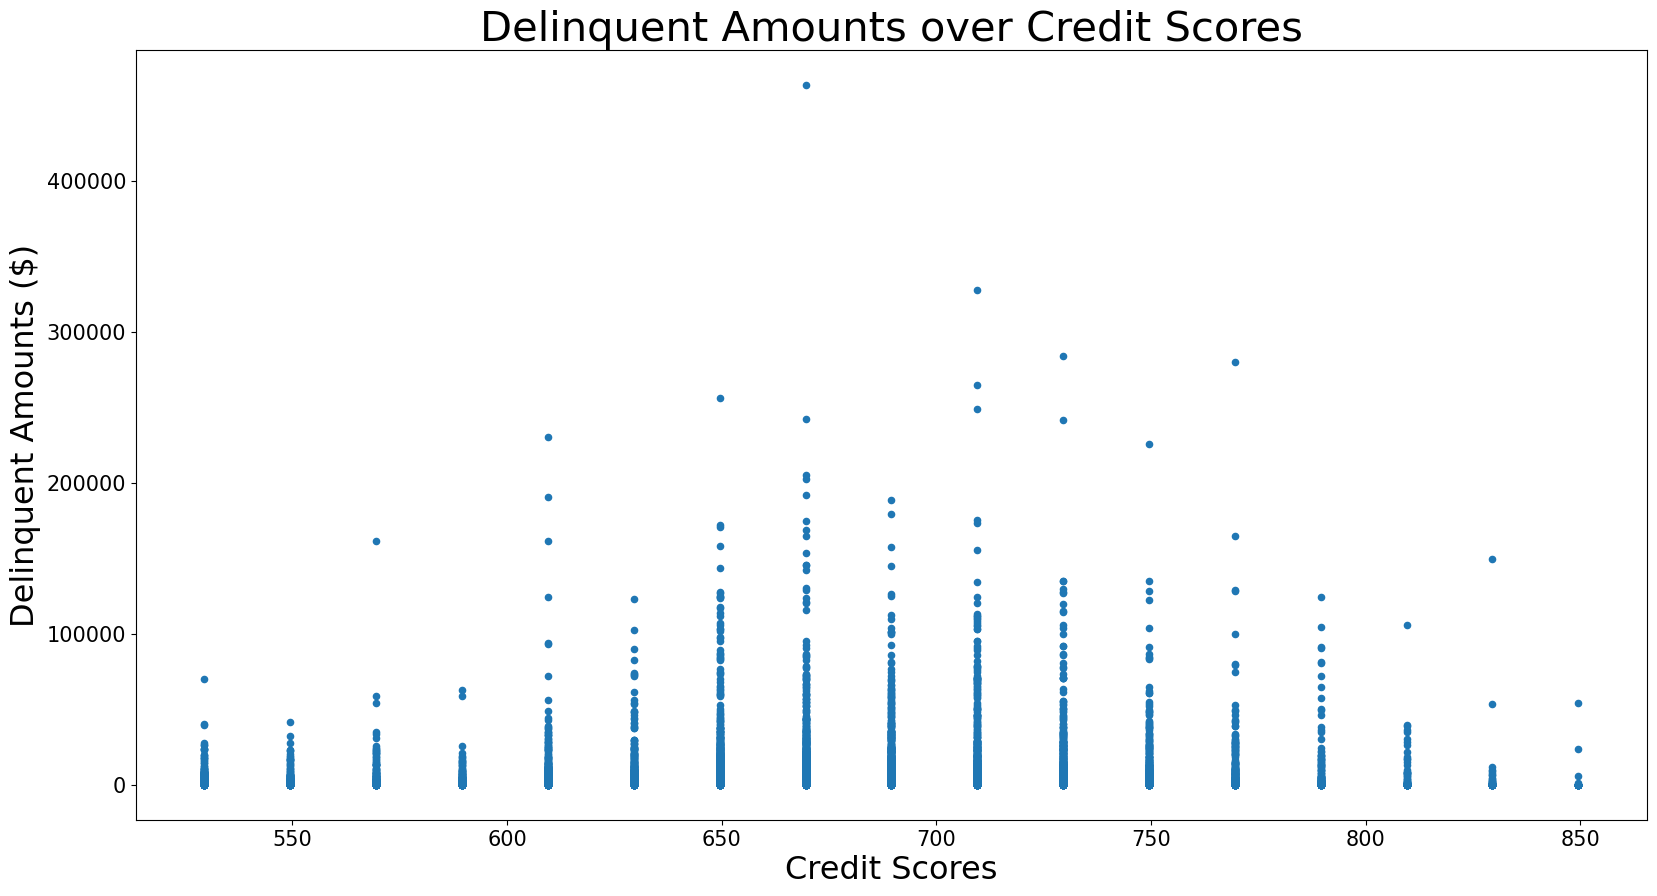

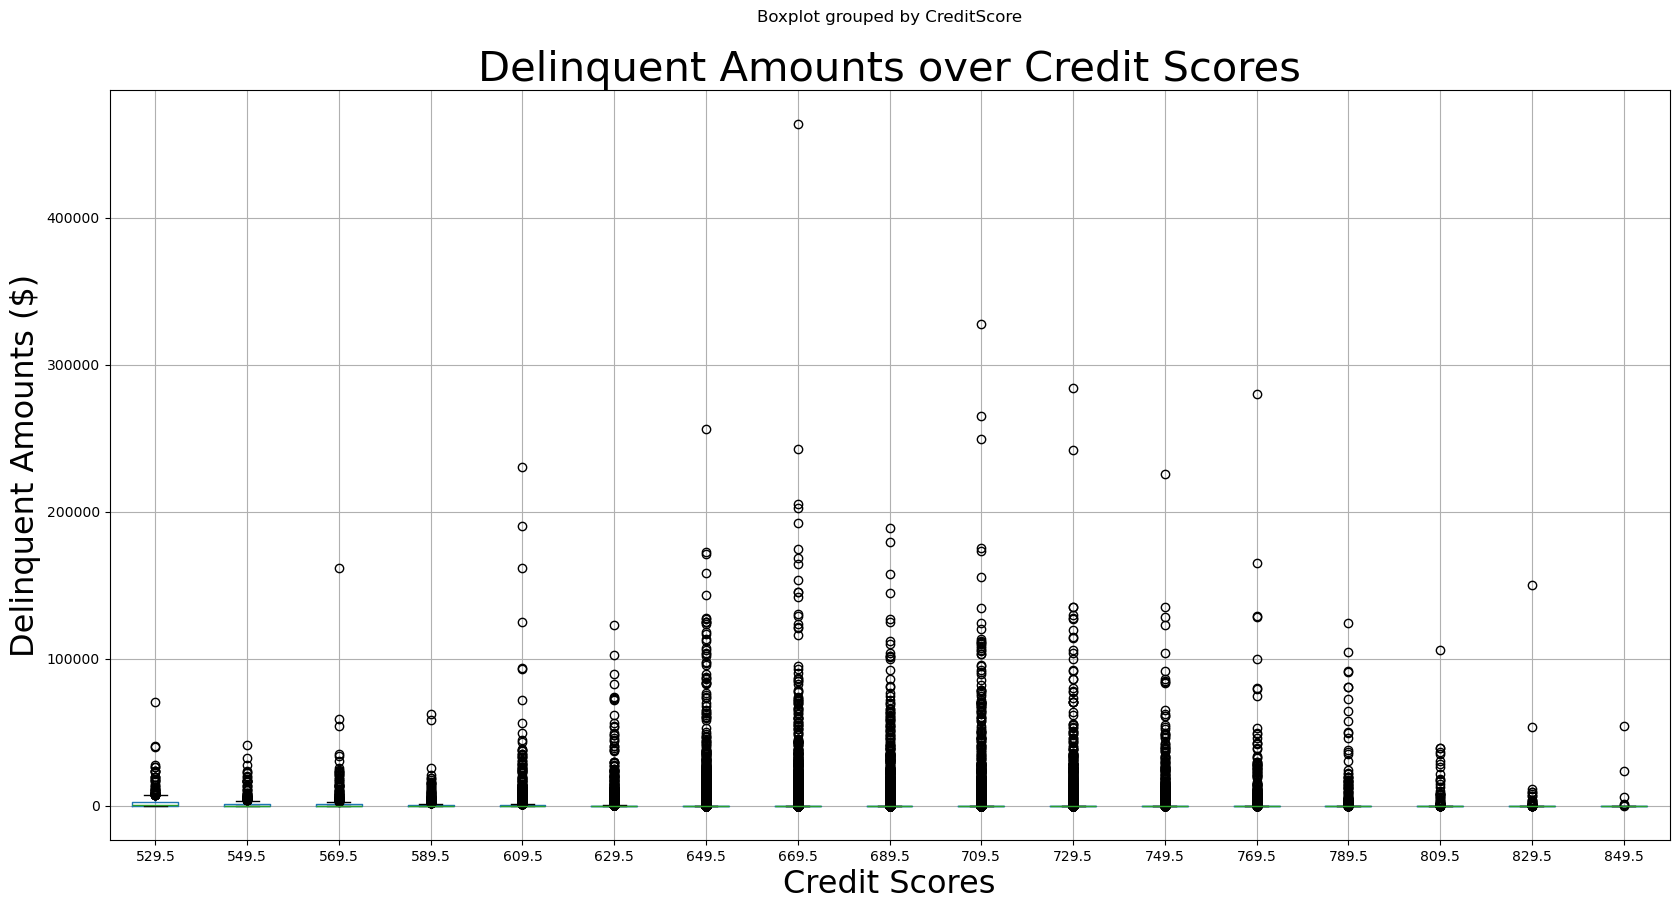

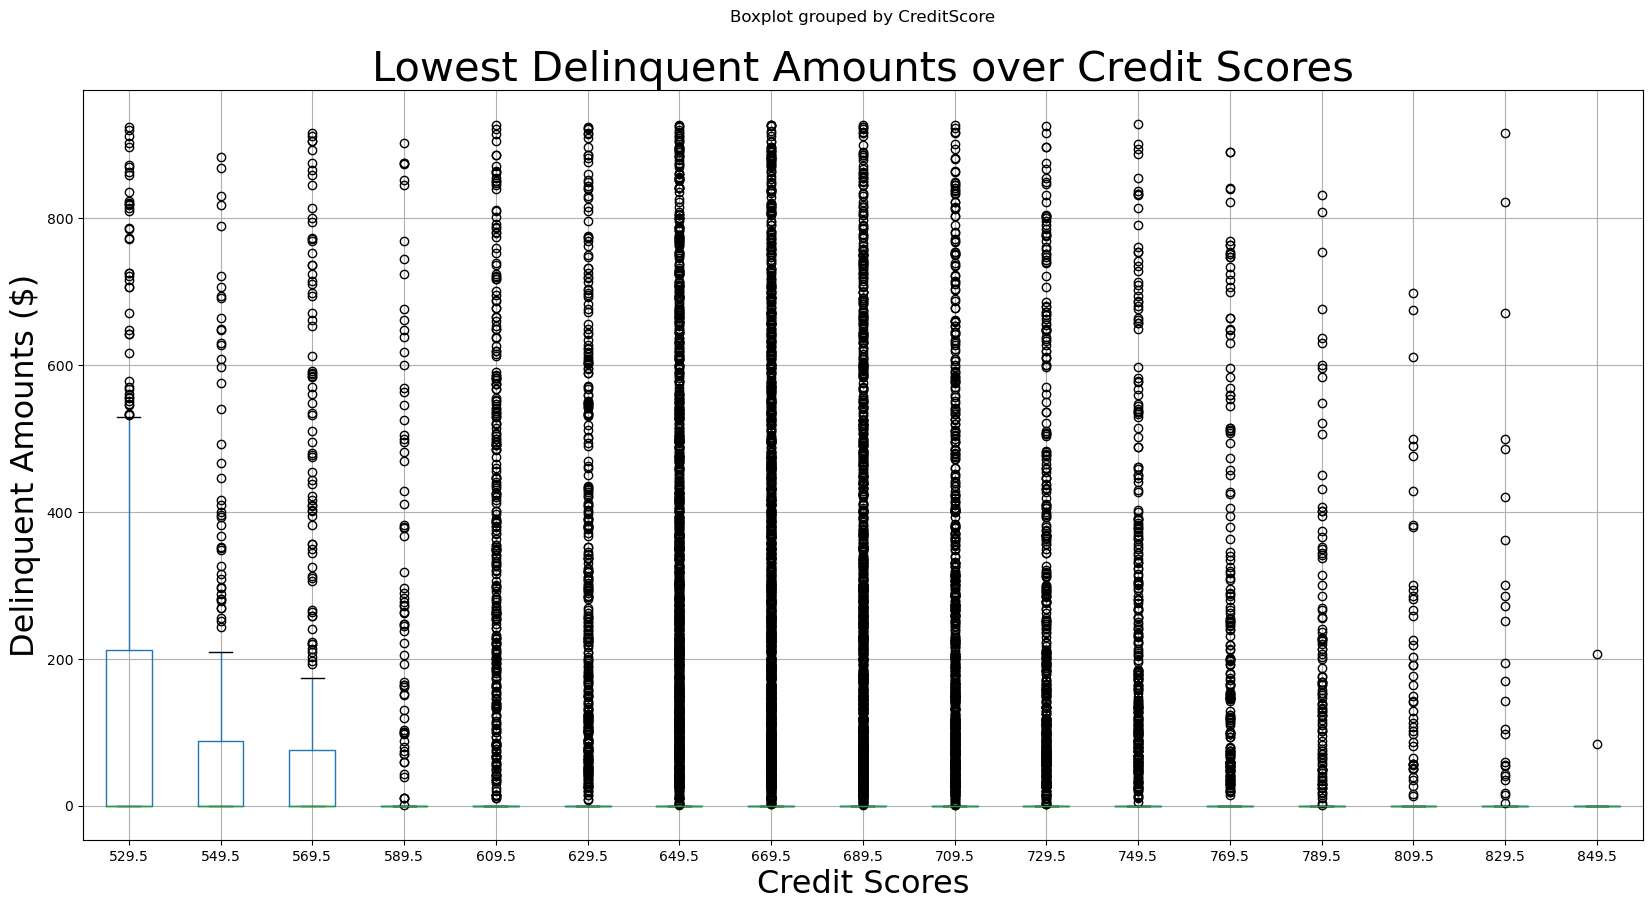

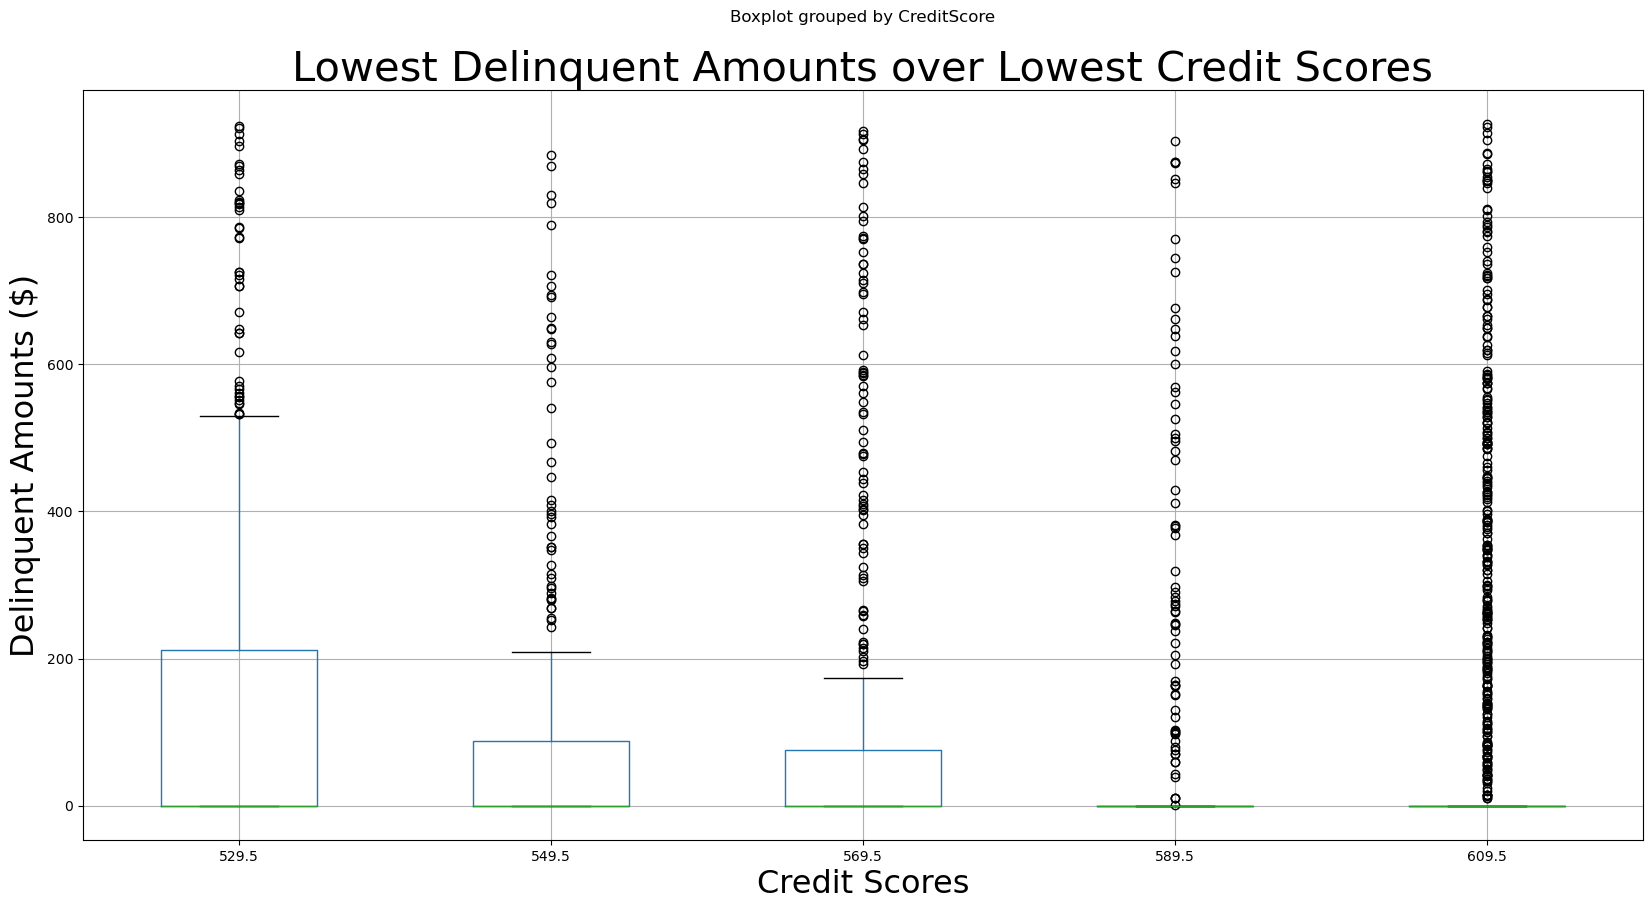

In [864]:
# Code for creating Scatterplot of ALL Credit Scores & ALL Delinquent Amounts

# creates & displays Scatterplot
df_prosper_loan_data.plot(x='CreditScore', y='AmountDelinquent', kind='scatter', figsize=(19.5,10), rot=0, fontsize=15) # ("rot=0" ensures x-axis labels are horizontal, so ALL Labels can be read)

# adds x-axis label to Scatterplot
plt.xlabel('Credit Scores', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY X-LABEL SIZE

# adds y-axis label to Scatterplot
plt.ylabel('Delinquent Amounts ($)', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY Y-LABEL SIZE

# adds title to Scatterplot
plt.title('Delinquent Amounts over Credit Scores', fontsize=30) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY TITLE SIZE


# Code for creating Box Plot with ALL Credit Scores & ALL Delinquent Amounts

# creates & displays Box Plot
df_prosper_loan_data.boxplot(column='AmountDelinquent', by='CreditScore', rot=0, figsize=(19.5,10)) # ("rot=0" ensures x-axis labels are horizontal, so ALL Labels can be read)

# adds x-axis label to Box Plot
plt.xlabel('Credit Scores', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Box Plot to SPECIFY X-LABEL SIZE

# adds y-axis label to Box Plot
plt.ylabel('Delinquent Amounts ($)', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Box Plot to SPECIFY Y-LABEL SIZE

# adds title to Box Plot
plt.title('Delinquent Amounts over Credit Scores', fontsize=30) # Must Be SEPARATE From AND BELOW Code For Box Plot to SPECIFY TITLE SIZE


# Code for creating Box Plot with Lowest Delinquent Amounts of ALL Credit Scores

# creates dataframe with Delinquent Amounts less than or equal to 929
df_credit_scores_and_low_delinquent_amounts = df_prosper_loan_data[df_prosper_loan_data["AmountDelinquent"] <= 929]

# creates & displays Box Plot
df_credit_scores_and_low_delinquent_amounts.boxplot(column='AmountDelinquent', by='CreditScore', rot=0, figsize=(19.5,10)) # ("rot=0" ensures x-axis labels are horizontal, so ALL Labels can be read)

# adds x-axis label to Box Plot
plt.xlabel('Credit Scores', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Box Plot to SPECIFY X-LABEL SIZE

# adds y-axis label to Box Plot
plt.ylabel('Delinquent Amounts ($)', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Box Plot to SPECIFY Y-LABEL SIZE

# adds title to Box Plot
plt.title('Lowest Delinquent Amounts over Credit Scores', fontsize=30) # Must Be SEPARATE From AND BELOW Code For Box Plot to SPECIFY TITLE SIZE


# Code for creating Box Plot with Lowest Credit Scores & Lowest Delinquent Amounts

# creates dataframe with Credit Scores between 300-629 & Delinquent Amounts less than or equal to 929
df_lowest_credit_scores_and_lowest_delinquent_amounts = df_prosper_loan_data[(df_prosper_loan_data["CreditScore"] <= 629) & (df_prosper_loan_data["AmountDelinquent"] <= 929)]

# creates & displays Box Plot
df_lowest_credit_scores_and_lowest_delinquent_amounts.boxplot(column='AmountDelinquent', by='CreditScore', rot=0, figsize=(19.5,10)) # ("rot=0" ensures x-axis labels are horizontal, so ALL Labels can be read)

# adds x-axis label to Box Plot
plt.xlabel('Credit Scores', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY X-LABEL SIZE

# adds y-axis label to Box Plot
plt.ylabel('Delinquent Amounts ($)', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY Y-LABEL SIZE

# adds title to Box Plot
plt.title('Lowest Delinquent Amounts over Lowest Credit Scores', fontsize=30) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY TITLE SIZE

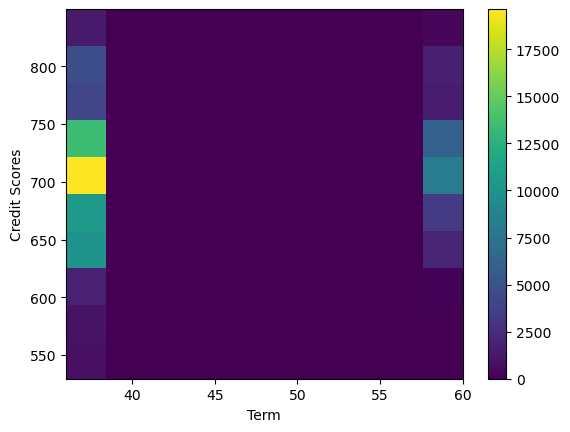

In [865]:
# Code for creating Heatmap with ALL Loan Terms & ALL Credit Scores

# creates & displays Heatmap
plt.hist2d(data=df_prosper_loan_data, x='Term', y='CreditScore')

# adds color to Heatmap
plt.colorbar()

# adds x-axis label to Heatmap
plt.xlabel('Term')

# adds y-axis label to Heatmap
plt.ylabel('Credit Scores');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In the **first scatterplot** with _all_ the **credit scores** and _all_ their **delinquent amounts**, the data was lined up in straight lines and clustered towards _zero_ instead of being distributed around the plot. The only significant outlier in the data was the data point with a delinquent amount _higher than 400000_. The distribution of data in the **first scatterplot** was unexpected. 

One **relationship** that was found between the **credit scores** and **delinquent amounts** was that the **credit scores** between **650** and **700** had the highest **delinquent amounts** or **late payments** than the rest of the _credit scores_, despite the data outliers.

Since the data in the _first scatterplot_ was distributed along straight lines instead of spread out in the plot, a **box plot** was created to search for more relationships between the **credit scores** and their **delinquent amounts**. However, the data in the **box plot** had most of the outliers lined up along straight lines and clustered towards _zero_ while the boxes were barely shown and looked more like straight lines. The only significant outlier in the data was the data point with a delinquent amount _higher than 400000_. The result of the **first box plot** was also unexpected.

Due to this, a **second box plot** with _all_ the **credit scores** and **delinquent amounts** limited to _less than or equal to 929_ was created. The **delinquent amounts** were limited to decrease the amount of outliers in the data and give a closer view of the boxes. The data in the **second box plot** was still lined up in the same straight lines, but it was no longer clustered towards _zero_. The data was instead spread out along the straight lines for all the credit scores, except for the credit score _850_, which only had two data points. Although, the **box plot** only had _three boxes_ shown for the credit scores, **529.5**, **549.5**, and **569.5**, while the boxes of the rest of the credits scores looked more like straight lines, the result of the **second box plot** was still unexpected. 

The **third box plot** was then created to provide a closer view of the boxes in the data to find more relationships between the **credit scores** and their **delinquent amounts**.

Another **relationship** that was found between the **credit scores** and **delinquent amounts** was that the three **lowest credit scores**, **529.5**, **549.5**, and **569.5**, had the **highest delinquent amounts** or **late payments** than the rest of the credit scores, despite the data outliers.

In the **heatmap** with _all_ the **loan terms** and _all_ the **credit scores**, the data showed that there was a variety of colors along the border of the left and right sides of the heatmap while the rest of the heatmap was one color instead of the variety of colors being distributed closer to the middle of the plot. The distribution of data in the **heatmap** was expected because the only **unique values** of the **loan terms** is **36 and 60**. This is proven in the _count plots_ titled **"Amount of each Loan Term for Loan Status Types"** and **"Amount of each Loan Term for Loans Past Due (>120 days)"**.

One **relationship** that was found between the **loan terms** and **credit scores** was that **credit scores around 700** and had **loan terms less than 40** the most occurrences.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There were no _relationships_ that were observed between other features that were not the main features of interest.

## Multivariate Exploration

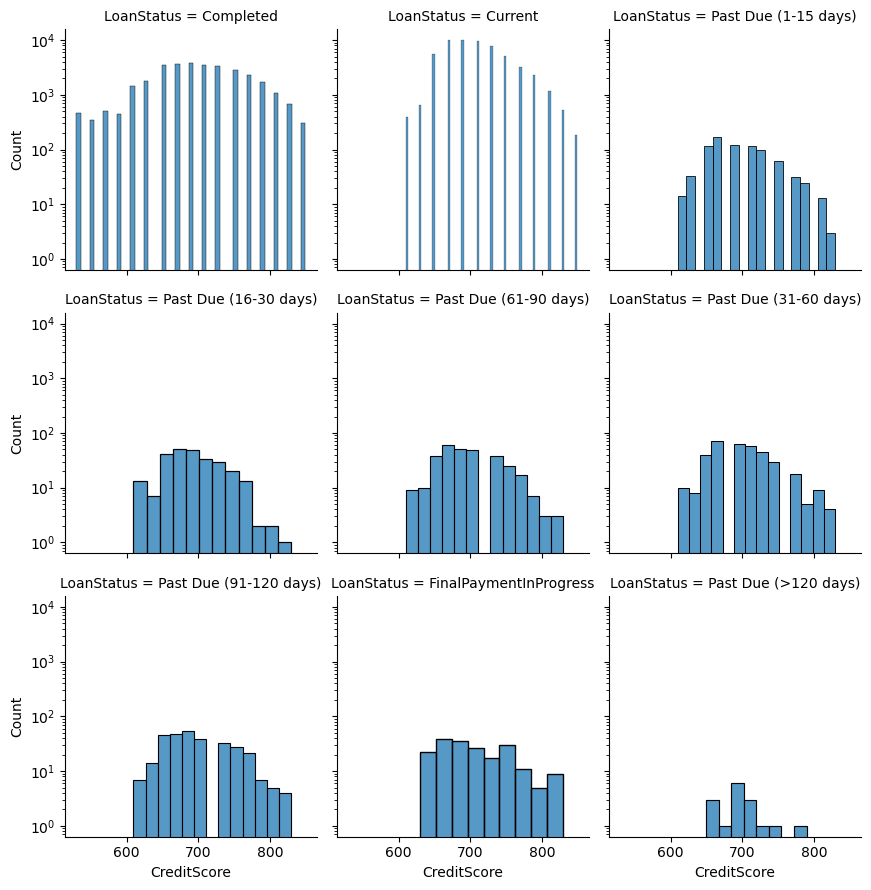

In [866]:
# Code for creating Facet Plot of histograms with ALL Credit Scores & ALL Loan Status Types

# creates & displays for Facet Plot of histograms with ALL Loan Status Types & ALL Credit Scores
g = sns.FacetGrid(df_prosper_loan_data, col='LoanStatus', col_wrap=3) # "col_wrap=3" Ensures each ROW has 3 Graphs
g.map(sns.histplot, 'CreditScore')

# Sets log scale for y-axis (TO BETTER SHOW All Facet Plots)
for ax in g.axes.flat:
    ax.set_yscale('log')

# Displays the Facet Plot
plt.show()

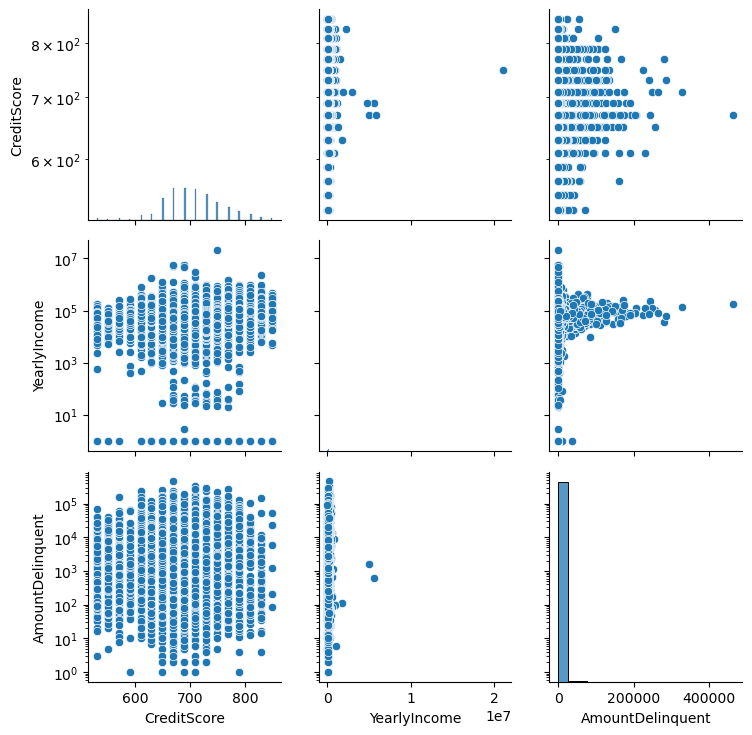

In [867]:
# Code for creating Plot Matrix with histograms & scatterplots of ALL Credit Scores, ALL Yearly Incomes, and ALL Delinquent Amounts

# creates dataframe with ALL Credit Scores, ALL Yearly Incomes, and ALL Delinquent Amounts
df_credit_scores_loan_status_types_yearly_incomes_delinquent_amounts = df_prosper_loan_data[["CreditScore", "YearlyIncome", "AmountDelinquent"]] # "LoanStatus" will NOT show up in the Plot Matrix because its value are WORDS, NOT NUMBERS like the other columns

# creates & displays Plot Matrix
g = sns.PairGrid(df_credit_scores_loan_status_types_yearly_incomes_delinquent_amounts)

# displays histograms of Plot Matrix
g.map_diag(sns.histplot)

# displays scatterplots of Plot Matrix
g.map_offdiag(sns.scatterplot) # "map_offdiag" allows y-axis Number Spacing of each Row to be DIFFERENT

# Sets log scale for y-axis (TO BETTER SHOW All Facet Plots)
for ax in g.axes.flat:
    ax.set_yscale('log')

# Displays the Facet Plot
plt.show()

[None, None]

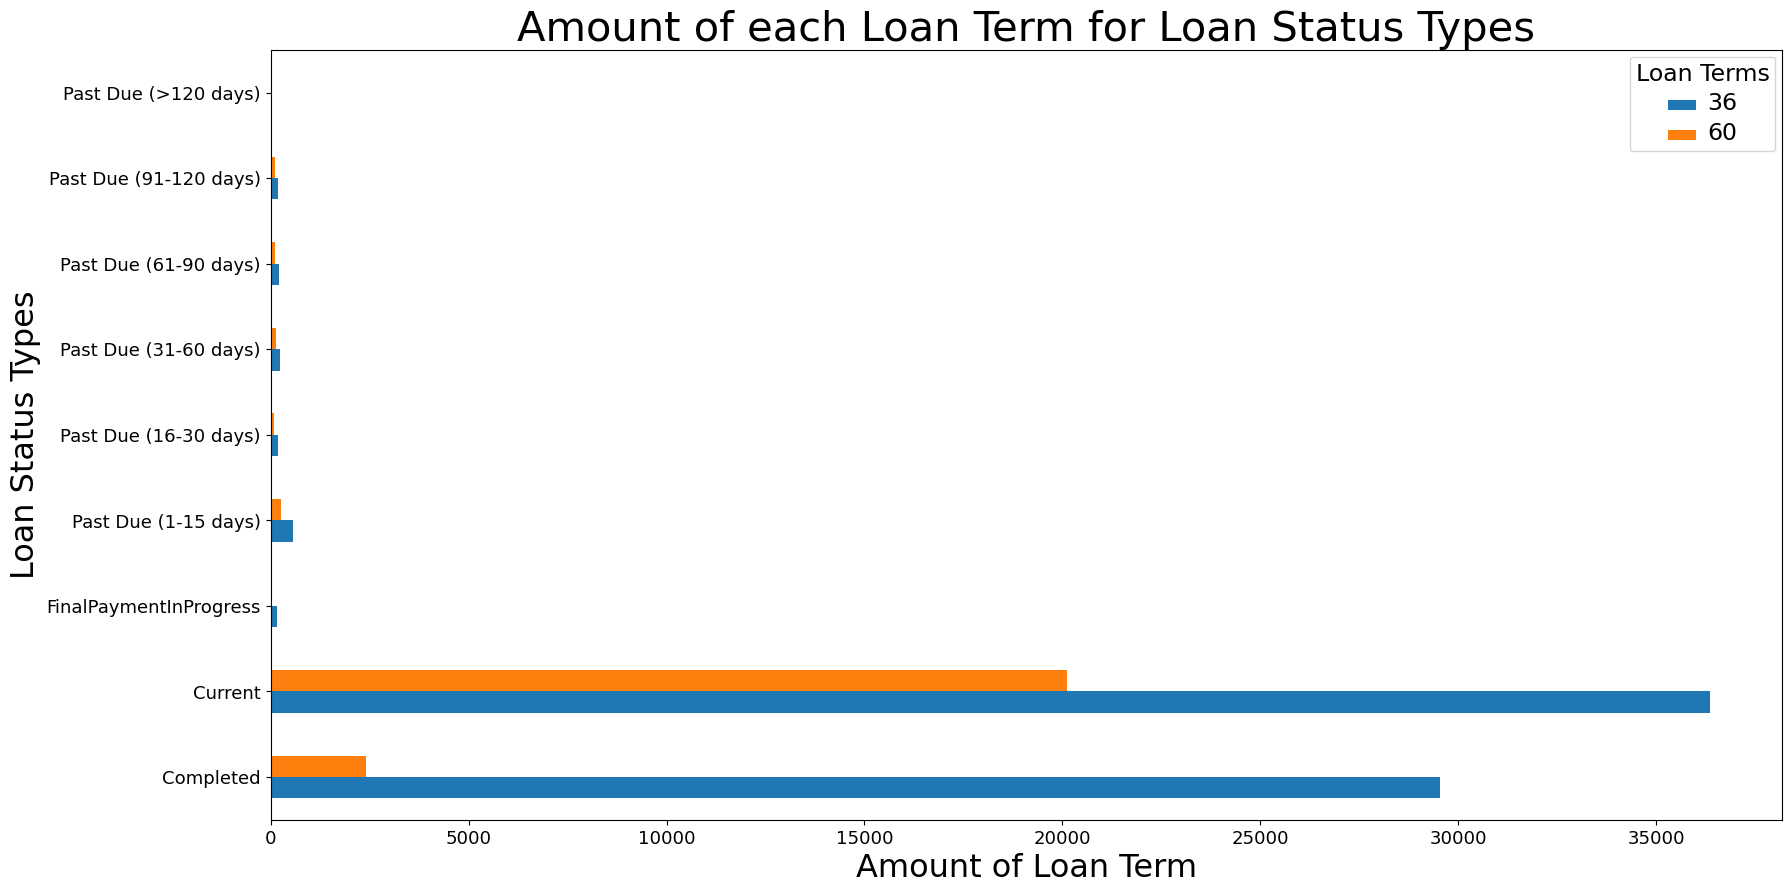

In [862]:
# Code for creating Horizontal Count Plot with ALL Loan Status Types & ALL Loan Terms

# creates array with ALL UNIQUE values of Loan Terms
loan_terms = df_prosper_loan_data["Term"].unique()

# creates dataframe with Loan Status Types, Loan Terms, and initial values for Amount of Loan Terms for each Loan Status Type
df_loan_status_and_loan_terms = pd.DataFrame({
                                              # creates array with ALL UNIQUE values of Loan Status Types
                                              'Loan Status Types': df_prosper_loan_data["LoanStatus"].unique(), # holds ALL UNIQUE values of Loan Status
                                              
                                              # adds extra terms to array with ALL UNIQUE values of Loan Terms to make array Same Size as Other Arrays in dataframe for Horizontal Count Plot
                                              'Loan Terms': np.append(loan_terms, [36, 36, 36, 36, 36, 36, 36]), # holds ALL UNIQUE values of Loan Terms with extra terms to make array Same Size as Other Arrays (if arrays are NOT Same Size, ERROR WILL OCCUR)

                                              # holds initial values for Amount of Loan Terms for each Loan Status Type
                                              'Amount of Loan Terms': [0, 0, 0, 0, 0, 0, 0, 0, 0]})

# reshapes the dataframe for Horizontal Count Plot using pivot
df_loan_status_and_loan_terms_pivot = df_loan_status_and_loan_terms.pivot(index='Loan Status Types', columns='Loan Terms', values='Amount of Loan Terms')

# inputs Loan Term sums into dataframe for Horizontal Count Plot
for column in df_loan_status_and_loan_terms_pivot: # iterates through Loan Terms
    for index, row in df_loan_status_and_loan_terms_pivot.iterrows(): # iterates through Loan Status
        # inputs amount of rows with Loan Status & Loan Term into dataframe for Horizontal Count Plot
        df_loan_status_and_loan_terms_pivot.loc[index, column] = df_prosper_loan_data[(df_prosper_loan_data["LoanStatus"] == index) & (df_prosper_loan_data["Term"] == column)].shape[0] # MUST USE [0] IN ".shape" TO DISPLAY ROW AMOUNT ONLY (not row AND column amount)        

# creates & displays Horizontal Count Plot
loan_status_and_loan_term_bar_chart = df_loan_status_and_loan_terms_pivot.plot.barh(figsize=(19.5,10), rot=0, fontsize=13) # Bar Chart is Horizontal, so ALL Labels can be read

# adds x-axis label to Horizontal Count Plot
plt.xlabel('Amount of Loan Term', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY X-LABEL SIZE

# adds y-axis label to Horizontal Count Plot
plt.ylabel('Loan Status Types', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY Y-LABEL SIZE

# adds title to Horizontal Count Plot
plt.title('Amount of each Loan Term for Loan Status Types', fontsize=30) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY TITLE SIZE

# obtains Legend Object
legend = loan_status_and_loan_term_bar_chart.get_legend() # MUST OBTAIN LEGEND OBJECT TO SPECIFY LEGEND TITLE

# specifies Legend Title
legend.set_title(title='Loan Terms', prop={'size': 17}) # Must Be Specified BEFORE Label or Title Will NOT Be Displayed At Correct Size

# specifies Legend Label Size
plt.setp(legend.get_texts(), size='17') # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY TITLE SIZE

[None, None]

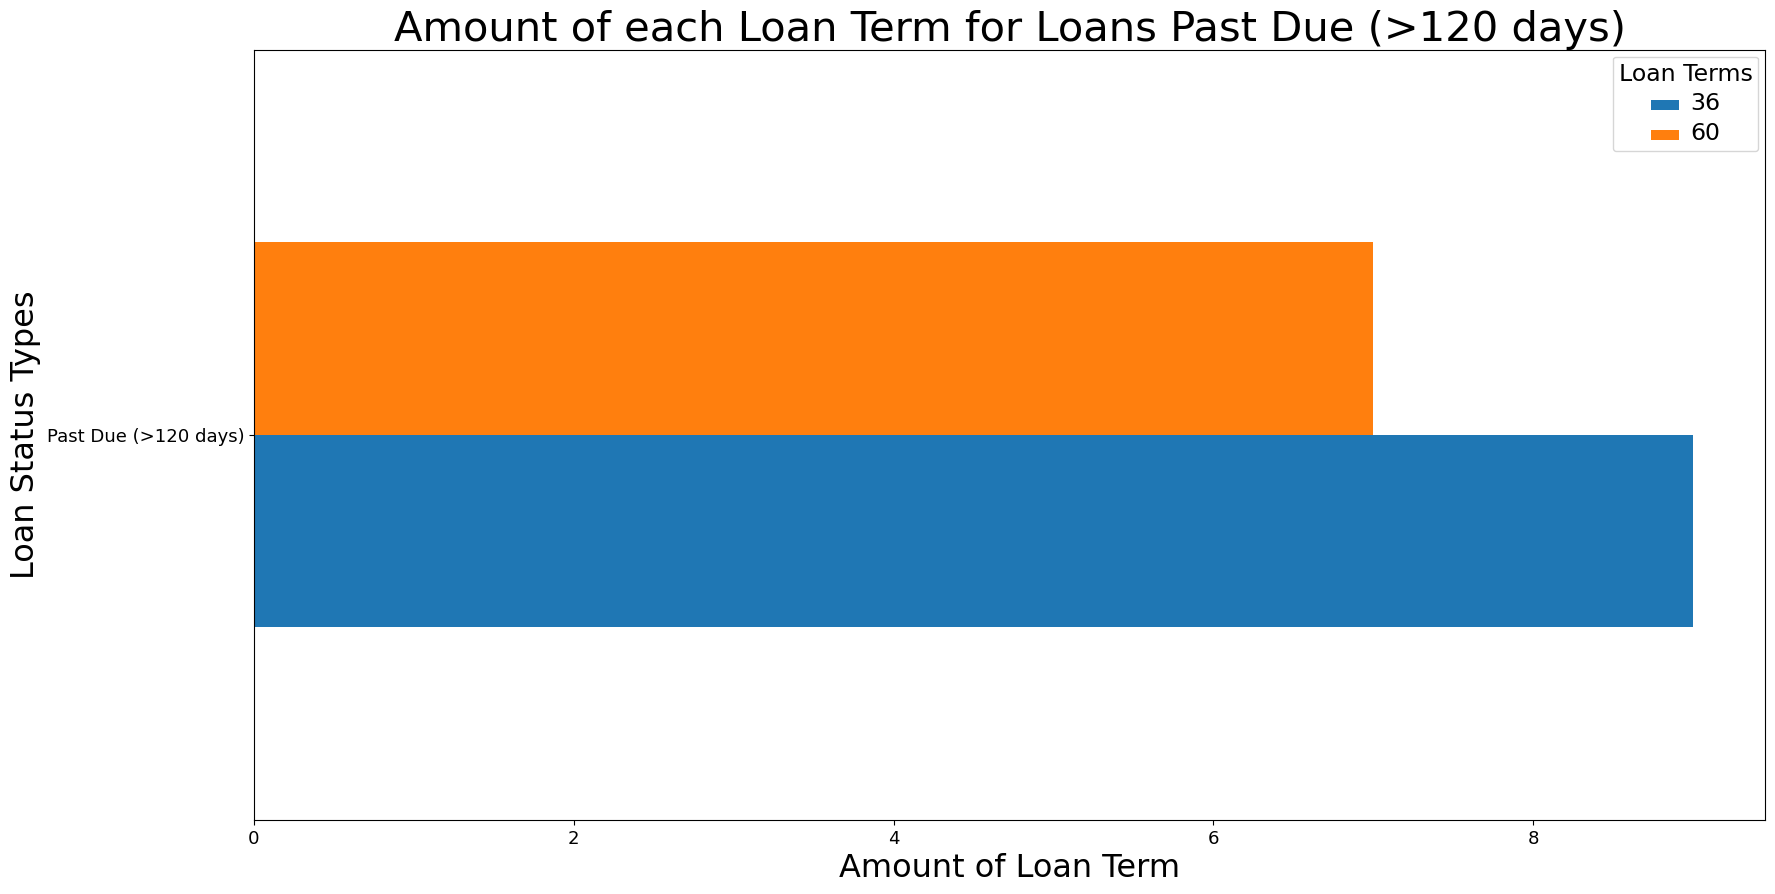

In [863]:
# Code for creating Horizontal Count Plot with "Past Due (>120 days)" Loan Status Type & ALL Loan Terms to Better Show results of "Past Due (>120 days)" Loan Status Type

# drops all rows, except for row, "Past Due (>120 days)", in dataframe for 2nd Horizontal Count Plot
df_past_due_120_days_loan_status_and_loan_terms_pivot = df_loan_status_and_loan_terms_pivot.drop(['Completed', 'Current', 'FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)'])

# creates & displays Horizontal Count Plot
past_due_120_days_loan_status_and_loan_term_bar_chart = df_past_due_120_days_loan_status_and_loan_terms_pivot.plot.barh(figsize=(19.5,10), rot=0, fontsize=13) # Bar Chart is Horizontal, so ALL Labels can be read

# adds x-axis label to Horizontal Count Plot
plt.xlabel('Amount of Loan Term', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY X-LABEL SIZE

# adds y-axis label to Horizontal Count Plot
plt.ylabel('Loan Status Types', fontsize=23) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY Y-LABEL SIZE

# adds title to Horizontal Count Plot
plt.title('Amount of each Loan Term for Loans Past Due (>120 days)', fontsize=30) # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY TITLE SIZE

# obtains Legend Object
legend = past_due_120_days_loan_status_and_loan_term_bar_chart.get_legend() # MUST OBTAIN LEGEND OBJECT TO SPECIFY LEGEND TITLE

# specifies Legend Title
legend.set_title(title='Loan Terms', prop={'size': 17}) # Must Be Specified BEFORE Label or Title Will NOT Be Displayed At Correct Size

# specifies Legend Label Size
plt.setp(legend.get_texts(), size='17') # Must Be SEPARATE From AND BELOW Code For Scatterplot to SPECIFY TITLE SIZE

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the **facet plot**, one **relationship** that was found between the **credit scores** and **loan status** types was that the **Completed** loans had _credit scores_ **from 300 to 850** and loans that were **"Past Due (>120 days)"** had _credit scores_ **between 600 to 800** while loans that were either **Current**, had **"FinalPaymentInProgress"**, **"Past Due (1-15 days)"**, **"Past Due (16-30 days)"**, **"Past Due (31-60 days)"**, **"Past Due (61-90 days)"**, and **"Past Due (91-120 days)"** had _credit scores_ **more than 600**.

Another **relationship** that was found between the **credit scores** and **loan status** types was that the loans that were **"FinalPaymentInProgress"**, **"Past Due (16-30 days)"**, **"Past Due (31-60 days)"**, **"Past Due (61-90 days)"**, **"Past Due (91-120 days)"**, and **"Past Due (>120 days)"** had **amounts of credit score occurrences that were _less than 100_** while the **Completed** and **Current** loans had the **amounts of credit score occurrences that were _more than 100_** and the loans that were **"Past Due (1-15 days)"** had the **amounts of credit score occurrences that were less than 1000**.

In the **plot matrix**, one **relationship** that was found was that the histogram of the **yearly income** was the only graph that did not have any data shown. 

Another **relationship** that was found was that the data was clustered toward the y-axis in the _scatterplot_ with the **delinquent amounts** _along the **x-axis**_ and the **credit scores** _along the **y-axis**_, the _scatterplot_ with the **delinquent amounts** _along the **x-axis**_ and the **yearly incomes** _along the **y-axis**_, and the _scatterplot_ with the **yearly incomes** _along the **x-axis**_ and the **credit scores** _along the **y-axis**_.

Another **relationship** that was found was that the data distributed throughout the whole plot in the _scatterplot_ with the **credit scores** _along the **x-axis**_ and the **yearly incomes** _along the **y-axis**_ and the _scatterplot_ with the **credit scores** _along the **x-axis**_ and the **delinquent amounts** _along the **y-axis**_.

Another **relationship** that was found was that the **credit scores** had a variety of different **delinquent amounts** as proven by the scatterplot with the **credit scores** _along the x-axis_ and the **delinquent amounts** _along the y-axis_.

Another **relationship** that was found was that **credit scores** closer to **700** had the most occurrences than the rest of the _credit scores_.

Another **relationship** that was found was that **delinquent amounts** closer to **0** had the most occurrences than the rest of the _delinquent amounts_.




The **features** of the **delinquent amounts** and **credit scores** _strengthened each other_ in the _scatterplot_ with the **delinquent amounts** _along the **x-axis**_ and the **credit scores** _along the **y-axis**_ and the _scatterplot_ with the **credit scores** _along the **x-axis**_ and the **delinquent amounts** _along the **y-axis**_.

The **features** of the **delinquent amounts** and **yearly incomes** _strengthened each other_ in the _scatterplot_ with the **delinquent amounts** _along the **x-axis**_ and the **yearly incomes** _along the **y-axis**_ and the _scatterplot_ with the **yearly incomes** _along the **x-axis**_ and the **delinquent amounts** _along the **y-axis**_.

The **features** of the **yearly incomes** and **credit scores** _strengthened each other_ in the _scatterplot_ with the **yearly incomes** _along the **x-axis**_ and the **credit scores** _along the **y-axis**_ and the _scatterplot_ with the **credit scores** _along the **x-axis**_ and the **yearly incomes** _along the **y-axis**_.

### Were there any interesting or surprising interactions between features?

One **surprising interaction** that was found was that the data in the **delinquent amounts** _histogram_ in the plot matrix had a similar shape to the data in the _second histogram_ titled, **Amount of Completed Loans among Lowest Yearly Incomes**, in the _"Univariate Exploration"_ section.

Another **surprising interaction** that was found was that the data in the **credit score** _histogram_ in the plot matrix had a similar shape to the data in the histogram for the **current loans** in the _first and second facet plots_ titled, **LoanStatus = Current**, in the _"Multivariate Exploration Exploration"_ section.

Another **surprising interaction** that was found was that the data in the _scatterplot_ with the **delinquent amounts** _along the **x-axis**_ and the **credit score** _along the **y-axis**_ in the plot matrix had a similar shape to the data in the scatterplot _titled_, **Delinquent Amounts over Credit Scores**, in the _"Bivariate Exploration"_ section. The difference between the two scatterplots is that their _x-axis_ and _y-axis_ are **switched**.

## Conclusions

The following **main findings** about the data were found after the data was explored. 

The **first main finding** was that the people with lower income tend to have their loans fully paid off.

The **second main finding** was that the people with lower credit scores do not tend to have higher fees for late payment. Instead, the people with 
credit scores between **650-700** tend to have higher fees for late payment.

The **third main finding** was that the people with loans that are past due more than 120 days have the credit scores between **600-800**. 
They do not tend to have the lowest credit scores, rather they tend to have credit scores around **700**.

The **fourth main finding** was that the credit scores, **529.5**, **549.5**, and **569.5** have the highest range of delinquent 
amounts. The credit score, **529.5**, had the highest range out of all three credit scores.

The **fifth main finding** was that the loan term, **36**, had the most occurrences in all the types of the loan status.

The **sixth main finding** was that the next credit score of a loan with a **Completed** loan status would most likely be **around 700**.
The next credit score of a loan with a **Current** loan status would most likely be **around 700**.
The next credit score of a loan with a **Past Due (1-15)** loan status would most likely be within the range of **600-700**.
The next credit score of a loan with a **Past Due (16-30)** loan status would most likely be within the range of **600-700**.
The next credit score of a loan with a **Past Due (61-90)** loan status would most likely be within the range of **600-700**.
The next credit score of a loan with a **Past Due (31-60)** loan status would most likely be within the range of **600-700**.
The next credit score of a loan with a **Past Due (91-120)** loan status would most likely be within the range of **600-700**.
The next credit score of a loan with a **FinalPaymentInProgress** loan status would most likely be within the range of **600-700**.
The next credit score of a loan with a **Past Due (>120 days)** loan status would most likely be **around 700**.

The **seventh main finding** was that the **Current** loan status had the highest delinquent amount.

The **eighth main finding** was that the most common credit scores throughout all the loans are **around 700**.

The **ninth main finding** was that the most common delinquent amounts throughout all the loans are **amounts close to zero**.



The CSV file of the dataset that was used for the data exploration was first uploaded into the dataset 
called **df_prosper_loan_data**. The data was then opened and viewed by using testing code. Next, the 
definitions of the first row of the CSV file or the column names of the dataset 
were looked up. Next, the following questions were made about the data. 

1. Which people tend to have fully paid off their loans: people with higher income or lower income?
2. Do people with lower credit scores tend to have higher fees for late payment?
3. Do people with loans that are past due more than 120 days have the lowest credit scores?
4. Which credit scores tend to have the highest range of delinquent amounts?
5. What were the loan terms that had the most occurrences in each loan status?
6. What would the next credit score of each loan status most likely be?
7. What loan status has the highest delinquent amount?
8. What is the most common credit scores throughout all the loans?
9. What is the most common delinquent amounts throughout all the loans?

Next, the columns, **"LoanStatus"**, **"StatedMonthlyIncome"**, **"CreditScoreRangeLower"**, **"CreditScoreRangeUpper"**, **"AmountDelinquent"**, **"ClosedDate"**, and **"IncomeVerifiable"** were found to answer the questions. 

Before analyzing the data to answer the questions, the data first needed to be cleaned. The **"CreditGrade"** column was then dropped because it had too many null values. Next, all the rows in the dataset with at least one null value in the **"LoanStatus"**, **"StatedMonthlyIncome"**, **"CreditScoreRangeLower"**, **"CreditScoreRangeUpper"**, **"AmountDelinquent"**, and **"IncomeVerifiable"** columns were dropped. Next, all rows with _false_ values in the **"IncomeVerifiable"** column were dropped because they confirmed that the corresponding values in the **"StatedMonthlyIncome"** column were _false_. Next, the **"StatedMonthlyIncome"** column was multiplied by twelve and put into a new column called **"YearlyIncome"**. Next, all the rows that did **not** have the value, **Completed**, under the **"LoanStatus"** column **and** did **not** have _null values_ under the **"ClosedDate"** column were dropped. Next, all the rows that had the value, **Completed**, under the **"LoanStatus"** column **and** had **null values** under the **"ClosedDate"** column were dropped. Next, the median of the values in the **"CreditScoreRangeLower"** and **"CreditScoreRangeUpper"** columns were found and put into a new column called **"CreditScore"**. Next, the credit scores in the **"CreditScore"** column that were not within the range _300-850_ were dropped. Next, the loan terms in the **Term** column that were not either _24_, _36_, _48_, _60_, _72_, or _84_ were dropped. 

After the data was cleaned, the data was then analyzed and put into graphs to answer the seven questions listed earlier. 

To answer the _first question_, a **histogram** was chosen to be used. The data of _only_ the complete loans was filtered out and put into a new dataframe called **df_prosper_complete_loans_data**. Next, only the "LoanStatus" and "YearlyIncome" columns in the **df_prosper_complete_loans_data** dataframe were put into a new dataframe called **df_prosper_complete_loans_and_yearly_incomes_data**. The **df_prosper_complete_loans_and_yearly_incomes_data** dataframe was then used to create a **histogram** of the amount of completed loans among the yearly incomes. Since the **first histogram** looked like it only had one bar, a **second histogram** with a closer view of the bar needed to be created. The complete loans with yearly incomes less than or equal to 1000000 were filtered out and put into a new dataframe called **lowest_yearly_incomes_data**. Next, only the "LoanStatus" and "YearlyIncome" columns in the **lowest_yearly_incomes_data** dataframe were put into a new dataframe called **df_prosper_complete_loans_and_lowest_yearly_incomes_data**. The **df_prosper_complete_loans_and_lowest_yearly_incomes_data** dataframe was then used to create a **second histogram** with the amount of completed loans among the yearly incomes less than or equal to 1000000.

The two **histograms** were then used to answer the following question with the **_first main finding_**:

_1. Which people tend to have fully paid off their loans: people with higher income or lower income?_


To answer the _seventh question_, a **bar chart** was chosen to be used. The data of each loan status was filtered out and puts into separate dataframes, except for the complete loans, which already had their own separate dataframe. Next, a new series was created to hold all the dataframes for each type of loan status. Next, a new dataframe called **df_loan_status_and_maximum_delinquent_amounts** was created to hold all the maximum delinquent amounts of each type of loan status. Next, a _for loop_ was created to find and input all of the maximum delinquent amounts of each type of loan status into the **df_loan_status_and_maximum_delinquent_amounts** dataframe. The **df_loan_status_and_maximum_delinquent_amounts** dataframe was then used to create a bar chart of the maximum delinquent amounts of each type of loan status.

The bar chart was then used to answer the following question with the **_seventh main finding_**:

_7. What loan status has the highest delinquent amount?_


To answer the _second question_, a **scatterplot** was chosen to be used. The **"CreditScore"** and **"AmountDelinquent"** columns from the **df_prosper_loan_data** dataset were used to create a scatterplot of all the credit scores and delinquent amounts.

The **scatterplot** was then used to answer the following question with the **_second main finding_**:

_2. Do people with lower credit scores tend to have higher fees for late payment?_


To answer the _fourth question_, a **box plot** was chosen to be used. The **"AmountDelinquent"** and **"CreditScore"** columns from the **df_prosper_loan_data** dataset were used to create a box plot of all the credit scores and delinquent amounts. Since the **first box plot** displayed most of the outliers lined up along straight lines and clustered towards _zero_ while the boxes were barely shown and looked more like straight lines, a **second box plot** with _all_ the **credit scores** and **delinquent amounts** limited to _less than or equal to 929_ was created. A **third box plot** was then created to provide a closer view of the boxes in the data.

The three **box plots** were then used to answer the following question with the **_fourth main finding_**:

_4. Which credit scores tend to have the highest range of delinquent amounts?_


To answer the _fifth question_, a **horizontal count plot** was chosen to be used. An array called **loan_terms** was created to hold all of the unique values of the loan terms. Next, a new dataframe called **df_loan_status_and_loan_terms** was created to hold all of the unique values of each type of loan status, the **loan_terms** array with extra terms to make the array the same size as the other arrays in the dataframe, and the initial values for the amount of loan terms for each loan status type. Next, the **df_loan_status_and_loan_terms** dataframe was reshaped using pivot into a new dataframe called **df_loan_status_and_loan_terms_pivot**. Next, a _for loop_ was created to input the loan term sums into the **df_loan_status_and_loan_terms_pivot** dataframe. The **df_loan_status_and_loan_terms_pivot** dataframe was then used to create a horizontal count plot. Since it did not look like there were any bars for the **loan status** type, **"Past Due (>120 days)"**, a **second horizontal count plot** was needed to show the bars of the **loan status** type, **"Past Due (>120 days)"**. All the rows, except for the rows with the value, **"Past Due (>120 days)"**, were then dropped to create a new dataframe called **df_past_due_120_days_loan_status_and_loan_terms_pivot**, which contained only rows with the value, **"Past Due (>120 days)"**. The **df_past_due_120_days_loan_status_and_loan_terms_pivot** dataframe was then used to create a **second horizontal count plot** with loans that were _past due more than 120 days.

The two **count plots** were then used to answer the following question with the **_fifth main finding_**:

_5. What were the loan terms that had the most occurrences in each loan status?_


To answer the _third_ and _sixth questions_, a **facet plot** was chosen to be used. The **df_prosper_loan_data** dataframe was then used to create a facet plot of all the credit scores and loan status types. Since the graphs of the **first facet plot** were too small to give a clear view of the data, two more _facet plots_ needed to be created. A dataframe containing only the _completed_ and _current_ loans was then created. Next, the dataframe was used to create a **second facet plot** of only the _completed_ and _current_ loans. Next, a dataframe called **df_prosper_incomplete_and_past_due_loans_data**, which contained only the loans with the status of _FinalPaymentInProgress_, _Past Due (1-15 days)_, _Past Due (16-30 days)_, _Past Due (31-60 days)_, _Past Due (61-90 days)_, _Past Due (91-120 days)_, and _Past Due (>120 days)_, was then created. The **df_prosper_incomplete_and_past_due_loans_data** dataframe was then used to create a **third facet plot** of only loans with the status of _FinalPaymentInProgress_, _Past Due (1-15 days)_, _Past Due (16-30 days)_, _Past Due (31-60 days)_, _Past Due (61-90 days)_, _Past Due (91-120 days)_, and _Past Due (>120 days)_.

The three **facet plots** were then used to answer the following questions with the **_third_** and **_sixth main findings_**:

_3. Do people with loans that are past due more than 120 days have the lowest credit scores?_

_6. What would the next credit score of each loan status most likely be?_


To answer the _eighth_ and _ninth questions_, a **plot matrix** was chosen to be used. The **"CreditScore"**, **"YearlyIncome"**, **"AmountDelinquent"** columns from the **df_prosper_loan_data** dataframe were put into a new dataframe called **df_credit_scores_loan_status_types_yearly_incomes_delinquent_amounts**. The **df_credit_scores_loan_status_types_yearly_incomes_delinquent_amounts** was then used to create a **plot matrix** of all the credit scores, yearly incomes, and delinquent amounts. Since there was only data shown the histograms for the credit scores and delinquent amounts, two more _plot matrices_ needed to be created. The **"CreditScore"** and **"YearlyIncome"** columns from the **df_prosper_loan_data** dataframe were put into a new dataframe called **df_credit_scores_loan_status_types_yearly_incomes**. The **df_credit_scores_loan_status_types_yearly_incomes** dataframe was then used to create a **second plot matrix** with histograms and scatterplots of all the credit scores and yearly incomes. The **"YearlyIncome"** and **"AmountDelinquent"** columns from the **df_prosper_loan_data** dataframe were put into a new dataframe called **df_loan_status_types_yearly_incomes_delinquent_amounts**. The **df_loan_status_types_yearly_incomes_delinquent_amounts** dataframe was then used to create a **third plot matrix** with histograms and scatterplots of all the yearly incomes and delinquent amounts.

The three **plot matrices** were then used to answer the following questions with the **_eighth_** and **_ninth main findings_**:

_8. What is the most common credit scores throughout all the loans?_

_9. What is the most common delinquents amount throughout all the loans?_

Finally, the testing code for viewing the data was deleted to polish the code.